<a href="https://colab.research.google.com/github/Brilliyandddd/Machine_Learning/blob/main/TugasPraktikum2_Brilliyand_Noval_Herdana_Putra_2141720104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Brilliyand Noval Herdana Putra
# NIM  : 2141720104

In [3]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/week3/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Identifikasi variabel bebas dan variabel target

  Variabel bebas:
  - age
  - sex
  - bmi
  - children
  - smoker

  Variabel Target
  *charge*

In [5]:
dataset.shape

dataset.info()

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Mengidentifikasi variabel yang paling berpengaruh terhadap variabel target

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-9-9dbb7bc862bf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)


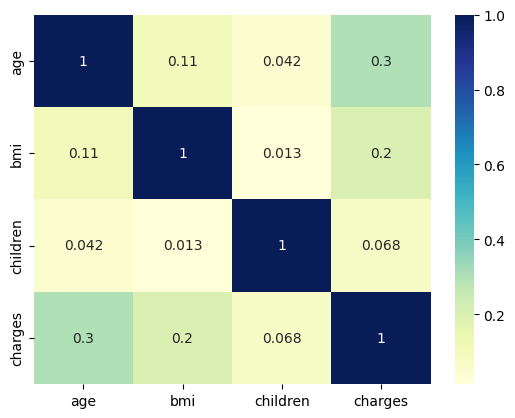

In [9]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Buat model multiple linear regression menggunakan Scikit-Learn.

In [10]:
X = dataset['age']
y = dataset['charges']

X.head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

### Membagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [12]:
X_train
y_train

966     23967.38305
522      9866.30485
155      6948.70080
671      3943.59540
1173     6457.84340
           ...     
802      2103.08000
53      37742.57570
350     11830.60720
79       6571.02435
792      2731.91220
Name: charges, Length: 936, dtype: float64

In [13]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [14]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    2707.051837
age       267.740141
dtype: float64

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     99.76
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           2.18e-22
Time:                        05:42:00   Log-Likelihood:                -10082.
No. Observations:                 936   AIC:                         2.017e+04
Df Residuals:                     934   BIC:                         2.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2707.0518   1113.327      2.431      0.015     522.139    4891.965
age          267.7401     26.806      9.988      0.000     215.133     320.348
==============================================================================
Omnibus:                      284.664   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.549
Skew:                           1.743   Prob(JB):                    5.88e-134
Kurtosis:                       4.891   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

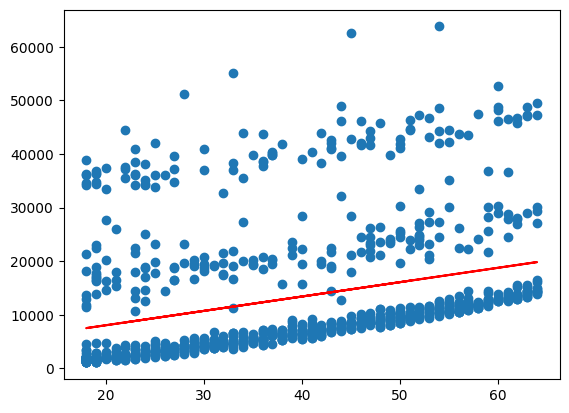

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2707.051 + 267.740*X_train, 'r')
plt.show()

### Latih model pada data latih dan lakukan prediksi pada data uji.

In [18]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

<ipython-input-19-8f8e8daad6e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


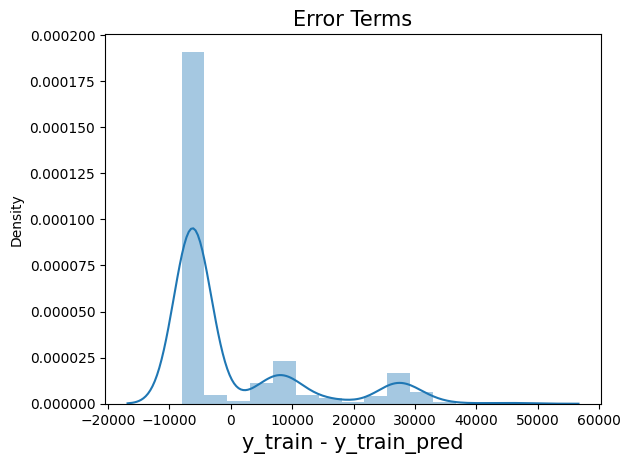

In [19]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

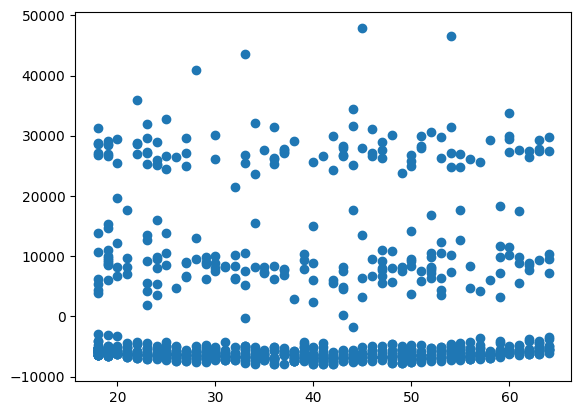

In [20]:
plt.scatter(X_train,res)
plt.show()

In [21]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr.predict(X_test_sm)

y_test_pred.head()

12      8865.075077
306    10203.775782
318    14487.618036
815     8061.854655
157     7526.374373
dtype: float64

Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

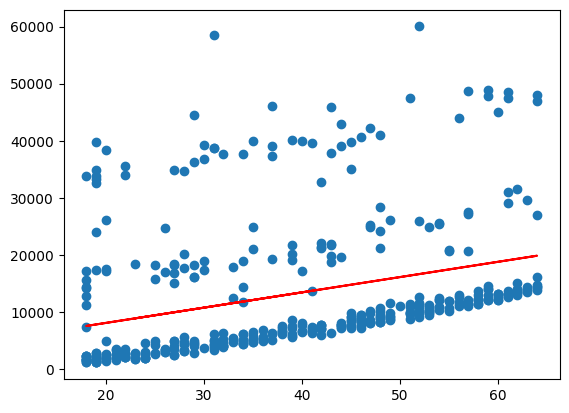

In [25]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

mae = mean_absolute_error(y_test, y_test_pred)

mse = mean_squared_error(y_test, y_test_pred)

rmse = np.sqrt(mse)

In [32]:
print("MAE:", mae)
print("MSE:", mse)
print("R-Squared (R2):", r_squared)

MAE: 9031.799151222724
MSE: 134798778.0695984
R-Squared (R2): 0.07161898944046363
